# Analyse

In [1]:
import numpy as np
from importlib import reload

## Plotter alle rådataene til magnetfeltet

In [6]:
import load_data
import plot_data
reload(load_data)
reload(plot_data)

mag_data_obj = load_data.load_magnetic_field_data()
for person, measurements in mag_data_obj.data.items():
    for name, measurement in measurements.items():
        plot_data.plot_one_to_many(
            x_array = measurement.data[0],
            y_arrays = [*measurement.data[1:]],
            legends = mag_data_obj.data_fields[1:],
            xlabel="time [s]",
            ylabel=r"Magnetic field $[\mu T]$",
            title=f"{name}",
            filepath=f"{person}/{name}"
        )

### Regne ut vinkel mellom nord og Nidarosdomen/Tyholttårnet

I følge Google Maps:

Koordinater tyholt: 63.422364810418905, 10.431957717382154

Koordinater Nidarosdomen: 63.42690834516923, 10.396940527455543


Koordinater målested (må sjekkes med målingene): 63.42016082533134, 10.404048501911404
#### WGS 84

 - semi-major axis: 6378137.0 m
 - semi-minor axis: 6356752.314245 m

https://en.wikipedia.org/wiki/World_Geodetic_System#WGS_84

 Konvertere til geosentrisk radius for en gitt latitude:
 $$R(\varphi )={\sqrt {\frac {(a^{2}\cos \varphi )^{2}+(b^{2}\sin \varphi )^{2}}{(a\cos \varphi )^{2}+(b\sin \varphi )^{2}}}}$$
 https://en.wikipedia.org/wiki/Earth_radius

Avstand mellom målepunktets høydegrad $\varphi_P$ og referansepunkt høydegrad $\varphi_{ref}$
$$d_\varphi(\varphi_P, \varphi_{ref}) = R(\varphi)(\varphi_P - \varphi_{ref})$$

Avstand mellom målepunktets breddegrad $\theta_P$ og referansepunkt breddegrad $\theta_{ref}$
$$d_\theta(\theta_P, \theta_{ref}) = |R(\varphi)(\theta_P - \theta_{ref})|$$

Vinkel mellom linje fra målepunkt til ref. punkt og nord:
$$
\alpha = tan^{-1}(d_\theta/d_\varphi)
$$

In [3]:
import location
reload(location)

# Punkter. coord_3 og coord_4 er hjørner i rettvinklet trekant.
# lage figur?
coord_nidaros = (63.42690834516923, 10.396940527455543)
coord_tyholt = (63.422364810418905, 10.431957717382154)
coord_maalepunkt = (63.42016082533134, 10.404048501911404)
coord_3 = (coord_nidaros[0], coord_maalepunkt[1])
coord_4 = (coord_tyholt[0], coord_maalepunkt[1])

d1 = location.distance_geopy(coord_3, coord_maalepunkt)
d2 = location.distance_geopy(coord_3, coord_nidaros)

angle_nidaros = np.degrees(location.angle_north(d1,d2))

d3 = location.distance_geopy(coord_4, coord_maalepunkt)
d4 = location.distance_geopy(coord_4, coord_tyholt)

angle_tyholt = np.degrees(location.angle_north(d3, d4))

print(f'{angle_nidaros=:.2f} deg')
print(f'{angle_tyholt=:.2f} deg')


angle_nidaros=25.26 deg
angle_tyholt=80.00 deg


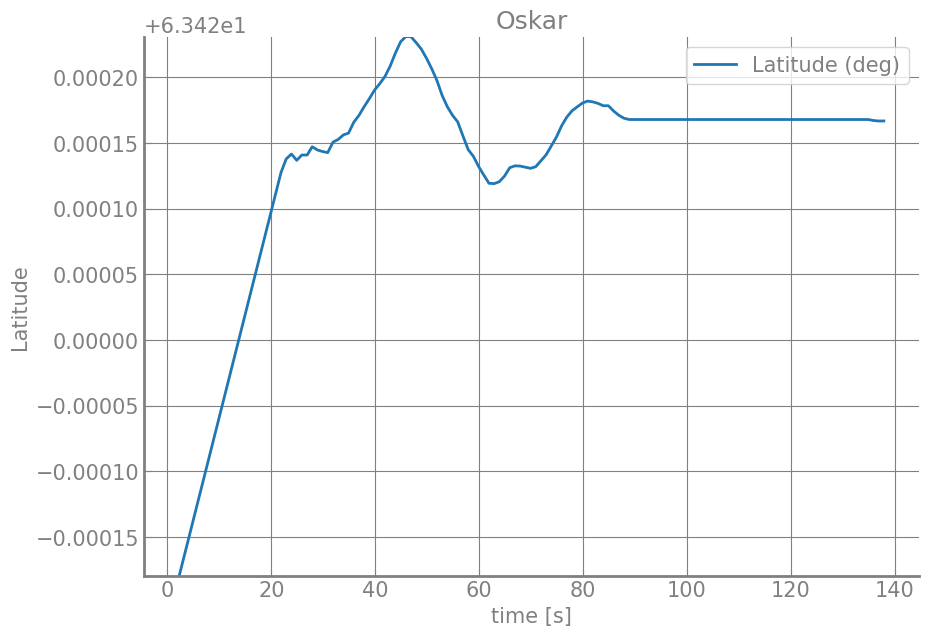

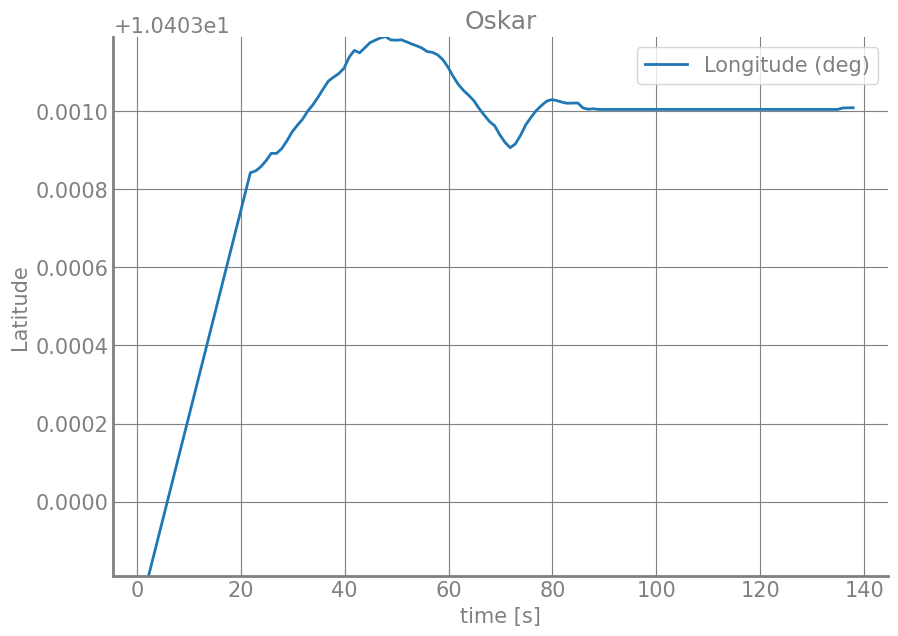

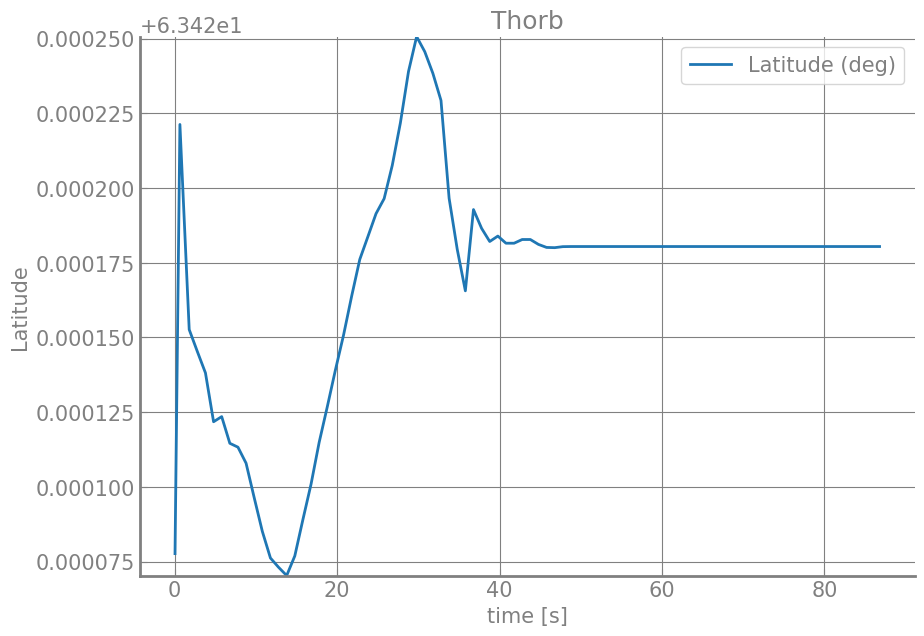

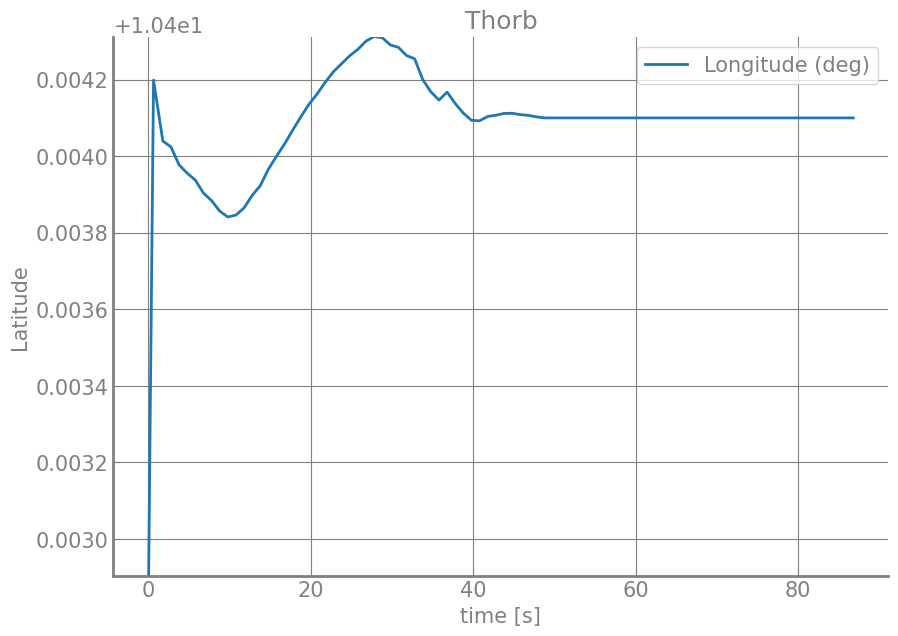

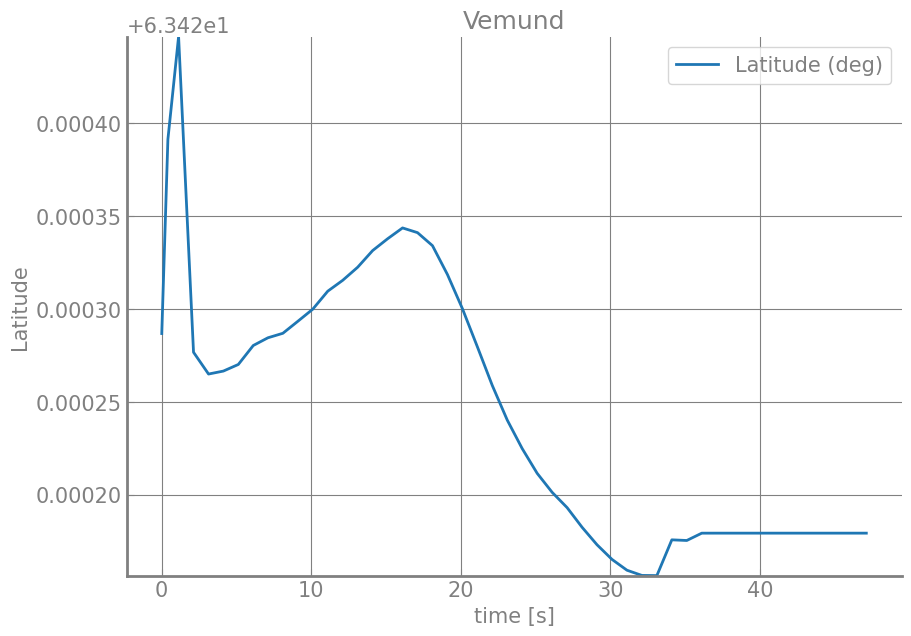

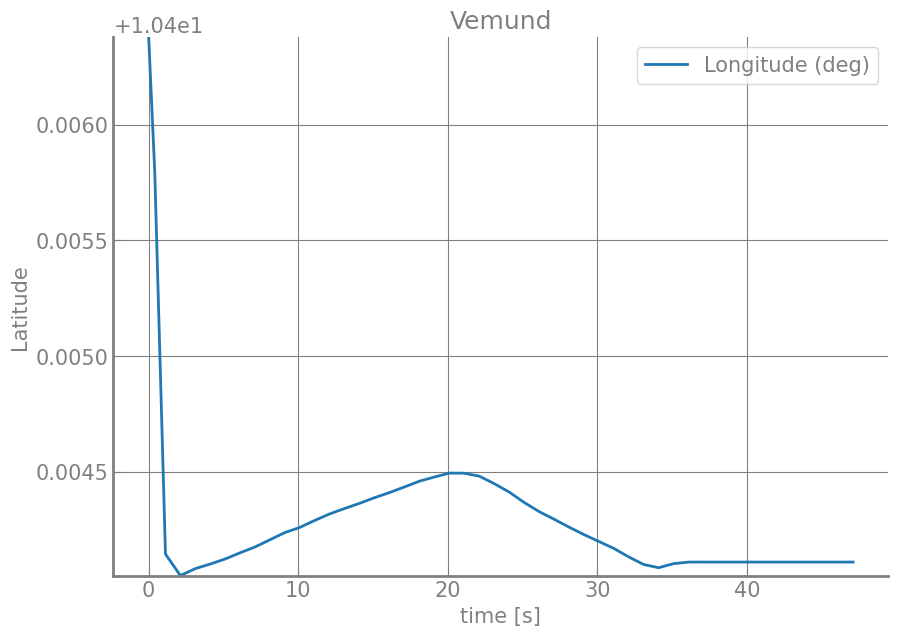

In [4]:
import load_data
import plot_data
reload(load_data)
reload(plot_data)

loc_data_obj = load_data.load_location_data()
for person, measurement in loc_data_obj.data.items():

    
    plot_data.plot_one_to_one(
        x_array = measurement.data[0],
        y_array = measurement.data[1],
        legend = loc_data_obj.data_fields[1],
        xlabel="time [s]",
        ylabel=r"Latitude",
        title=f"{person}",
        # filepath=f"{person}/{name}"
    )
    plot_data.plot_one_to_one(
        x_array = measurement.data[0],
        y_array = measurement.data[2],
        legend = loc_data_obj.data_fields[2],
        xlabel="time [s]",
        ylabel=r"Latitude",
        title=f"{person}",
        # filepath=f"{person}/{name}"
    )